<a href="https://colab.research.google.com/github/aleeshajaganath/Transfer-Learning-/blob/master/classification_the_presence_of_DR_%2CDM_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Packages**




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd  gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
!pip install tensorflow==1.14.0

In [0]:
pip install -U keras

# **MobileNet model**


In [0]:
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
# from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNet(input_shape = (512, 512, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()
prediction_layer = tf.keras.layers.Dense(1, activation="sigmoid")
mobile_model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D()
,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  prediction_layer
])



Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 513, 513, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32

# **VGG16 MODEL**

In [0]:

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG16(input_shape = (512, 512, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()
prediction_layer = tf.keras.layers.Dense(1, activation="sigmoid")
VGG16_model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  prediction_layer
])



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

# **Implimented model**

In [0]:


from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.optimizers import SGD

model = models.Sequential()

model.add(layers.Conv2D(32, (4, 4), strides=(2, 2),padding='same', kernel_initializer='he_uniform', input_shape=(512, 512,3),activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))
#model.add(tf.keras.regularizers.l2(
#    l=0.01
#))
model.add(layers.Conv2D(32, (4, 4),padding=[[0, 0], [1, 1], [1, 1], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((3, 3), padding='valid', strides=(2, 2)))
"_____"

#model = models.Sequential()
model.add(layers.Conv2D(64, (4, 4), strides=(2, 2),activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (4, 4),padding=[[0, 0], [2, 2], [2, 2], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
"_____"

model.add(layers.Conv2D(128, (4, 4), strides=(1, 1),padding=[[0, 0], [2, 2], [2, 2], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (4, 4), strides=(1, 1),padding=[[0, 0], [2, 2], [2, 2], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
"_____"

model.add(layers.Conv2D(256, (4, 4), strides=(1, 1),padding=[[0, 0], [2, 2], [2, 2], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
"_____"

model.add(layers.Conv2D(384, (4, 4), strides=(1, 1),padding=[[0, 0], [2, 2], [2, 2], [0, 0]],activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
#512
"_____"
model.add(
layers.Conv2D(512, (4, 4), strides=(1, 1),padding=[[0, 0], [2, 2], [2, 2], [0, 0]] ,activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((3, 3), padding='valid', strides=(2, 2)))
"_____"

model.add(layers.Flatten())
model.add(layers.Dense(1024,activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.Dense(1024,activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))
model.add(layers.Dense(1,activity_regularizer=tf.keras.regularizers.l2(
    l=0.0005)))


opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True, name='SGD')
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 255, 32)      16416     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 255, 255, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 255, 255, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)    


# **train dataset**

Training Dataset (413, 3) (413, 12)
                   Image name  Risk of macular edema 
Retinopathy grade                                    
0                         134                     134
1                         279                     279


1    279
0    134
Name: Retinopathy grade, dtype: int64

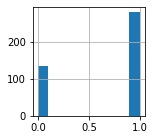

In [0]:
import csv
import pandas as pd
df = pd.read_csv('B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels for binary classification.csv')
df1=pd.read_csv('B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')  
from sklearn.utils import shuffle
df = shuffle(df)
print("Training Dataset",df.shape,df1.shape)
# df[['Image name','Retinopathy grade','Risk of macular edema ']].head(13)
print(df.pivot_table(index='Retinopathy grade', aggfunc=len))
#data balancing
df['Retinopathy grade'].hist(figsize = (2, 2))
df['Retinopathy grade'].value_counts()

# balancing the dataset

New Data Size: 558 Old Size: 413


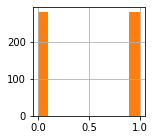

In [0]:
"balancing using the replacement method"

def balance_data(class_size,df):
    train_df = df.groupby(['Retinopathy grade']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['Retinopathy grade'].hist(figsize = (10, 5))
    return train_df

df = balance_data(df.pivot_table(index='Retinopathy grade', aggfunc=len).max().max(),df) # I will oversample such that all classes have the same number of images as the maximum
df['Retinopathy grade'].hist(figsize = (2, 2))

# **statistics**

In [0]:
print("Retinopathy grade= 0 ,Risk of macular edema =0 \n",len(df[(df['Retinopathy grade'] == 0) & (df['Risk of macular edema ']==0)]))
print("Retinopathy grade= 0 ,Risk of macular edema =1\n",len(df[(df['Retinopathy grade'] == 0) & (df['Risk of macular edema ']==1)]))
print("Retinopathy grade= 1 ,Risk of macular edema =0\n",len(df[(df['Retinopathy grade'] == 1) & (df['Risk of macular edema ']==0)]))
print("Retinopathy grade= 1 ,Risk of macular edema =1\n",len(df[(df['Retinopathy grade'] == 1) & (df['Risk of macular edema ']==1)]))

Retinopathy grade= 0 ,Risk of macular edema =0 
 279
Retinopathy grade= 0 ,Risk of macular edema =1
 0
Retinopathy grade= 1 ,Risk of macular edema =0
 42
Retinopathy grade= 1 ,Risk of macular edema =1
 237


# **train**

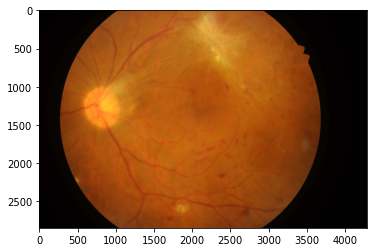

In [0]:
# reader=df[['Image name','Retinopathy grade','Risk of macular edema ']]
# #READING FOLDER NAME
import matplotlib.pyplot as plt
image=[]
# target=[]
f="B. Disease Grading/1. Original Images/train/a. Training Set/"#preprocess_train/"#Set cropped/"
for row in range(df.shape[0]):
    #t1=0,t2=0
    image.append(f+df.iloc[row, 0]+str(".jpg"))

# df.iloc[1, 0],image
plt.imshow(plt.imread((image[0])))

# preprocessing of the image and save in folder

# `New Section`

In [0]:

from matplotlib import pyplot as plt

import cv2 ,glob ,numpy
import os

images_name = []
folder="/B. Disease Grading/1. Original Images/train/a. Training Set/"

for filename in os.listdir(folder):
 
        images_name.append(filename)
        


def scaleRadius( img , scale ) :

    x=img [ int(img.shape[ 0 ] / 2) , : , : ].sum ( 1 )
    r =(x>x.mean( ) / 10 ).sum( ) / 2

    s= scale*1.0/r

    return cv2.resize( img , ( 0 , 0 ) , fx=s , fy=s )

#/scratch/diabetic_retinopathy/code/
scale =300
f=folder

for i in range(len(images_name)):
#for f in glob.glob("Dataset/diabetic retinopathy/B. Disease Grading/1. Original Images/train/a. Training Set/∗.jpg")+ glob.glob("/scratch/diabetic_retinopathy/code/Dataset/diabetic retinopathy/B. Disease Grading/1. Original Images/Test/b. Testing Set/∗.jpg" ) :
    print(1)
    try :
                a=cv2.imread( f+images_name[i] )
                #s c a l e
#                img
#                to
#                a
#                given
#                radius
                a=scaleRadius( a ,scale )
                #s u b t r a c t
#                local
#                mean
#                color
                a=cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30), -4,128)
                #remove
#                outer
#                10%
                b=numpy.zeros( a.shape )
                cv2.circle( b , (int(a.shape [1]/2) , int(a.shape[0]/2)) ,int(scale*.9), (1 ,1 ,1) , -1 ,8 ,0)
                a=a * b+128 * (1 - b )
                cv2.imwrite("Dataset/diabetic retinopathy/B. Disease Grading/1. Original Images/Untitled Folder/"+images_name[i] , a )

    except :
        print( f+images_name[i])

### crop out the black portion of the image and save in folder

In [0]:
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import cv2
from matplotlib import pyplot as plt




import csv
import pandas as pd

import os

images_name = []
folder="/scratch/diabetic_retinopathy/code/Dataset/diabetic retinopathy/B. Disease Grading/1. Original Images/train/a. Training Set/"

for filename in os.listdir(folder):
 
        images_name.append(filename)
        
for i in range(len(images_name)):


                    im1 = cv2.imread(folder+images_name[i])
                    imgray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
                    ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                    _,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

                    contour = sorted(contours, key=cv2.contourArea, reverse=True)  
                    cnt = contour[0]

                    mask = np.zeros_like(im1) 
                                
                    mask=cv2.drawContours(mask, [cnt], -1,(255,255,255), thickness=cv2.FILLED)
                                    
                        
                    out = np.zeros_like(im1)
                                  
                    out[mask == 255] = im1[mask == 255]

                                    
                    (y, x,z) = np.where(mask == 255)
                                    
                    (topy, topx) = (np.min(y), np.min(x))
                                    
                    (bottomy, bottomx) = (np.max(y), np.max(x))
                    image=plt.imread(folder+images_name[i])

                    image_to_crop=plt.imread(folder+images_name[i])
                                    
                    out = image_to_crop[topy:bottomy+1, topx:bottomx+1]
#                    plt.imshow(out)
                    plt.imsave("B. Disease Grading/1. Original Images/train/cropped_black_portion_from_fundus_ image/"+images_name[i],out)
                    
         

# train

In [0]:

from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import cv2
from matplotlib import pyplot as plt




import csv
import pandas as pd

writer=[]
   
for i in range(len(image)):

           try:
                    imgfile = Image.open(image[i]) 
                   
                    img = load_img(image[i], grayscale=False, target_size=(512,512,3))


                    img = img_to_array(img)


                    img = img.astype('float32')


                    img = img / 255.0

                    value = img.flatten()
                    writer.append(value)

                   
           except OSError as e:

                   print("last file is"+file)

Using TensorFlow backend.


(558, 3)

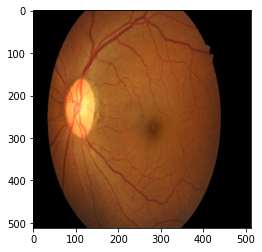

In [0]:
plt.imshow(img)
df.shape

In [0]:
import numpy as np
X_train=np.array(writer[:][:])
Y_train=df[['Retinopathy grade']]#,'Risk of macular edema '
Y_train
Y_train=np.array(Y_train[:][:])
X_train=X_train.reshape([len(writer),512,512 ,3])

# compile  all models  models

In [0]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9, nesterov=True, name='SGD')
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train , Y_train , epochs = 30, batch_size = 16)

In [0]:
mobile_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mobile_model.fit(X_train , Y_train , epochs = 30, batch_size = 16)

Epoch 1/30
35/35 [==============================] - 2s 60ms/step - loss: 0.2221 - accuracy: 0.9211
Epoch 2/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1966 - accuracy: 0.9229
Epoch 3/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1707 - accuracy: 0.9247
Epoch 4/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1853 - accuracy: 0.9158
Epoch 5/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1709 - accuracy: 0.9373
Epoch 6/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1643 - accuracy: 0.9391
Epoch 7/30
35/35 [==============================] - 2s 61ms/step - loss: 0.1855 - accuracy: 0.9283
Epoch 8/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1720 - accuracy: 0.9319
Epoch 9/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1529 - accuracy: 0.9480
Epoch 10/30
35/35 [==============================] - 2s 60ms/step - loss: 0.1521 - accuracy: 0.9444
Epoch 11/

In [0]:
VGG16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
VGG16_model.fit(X_train , Y_train , epochs = 30, batch_size = 16)

Epoch 1/30
35/35 [==============================] - 8s 222ms/step - loss: 0.7194 - accuracy: 0.5448
Epoch 2/30
35/35 [==============================] - 7s 189ms/step - loss: 0.6171 - accuracy: 0.6559
Epoch 3/30
35/35 [==============================] - 7s 189ms/step - loss: 0.5336 - accuracy: 0.7222
Epoch 4/30
35/35 [==============================] - 7s 189ms/step - loss: 0.5353 - accuracy: 0.7079
Epoch 5/30
35/35 [==============================] - 7s 188ms/step - loss: 0.4655 - accuracy: 0.7760
Epoch 6/30
35/35 [==============================] - 7s 189ms/step - loss: 0.4462 - accuracy: 0.7939
Epoch 7/30
35/35 [==============================] - 7s 189ms/step - loss: 0.4383 - accuracy: 0.7867
Epoch 8/30
35/35 [==============================] - 7s 189ms/step - loss: 0.4185 - accuracy: 0.8100
Epoch 9/30
35/35 [==============================] - 7s 189ms/step - loss: 0.4184 - accuracy: 0.7939
Epoch 10/30
35/35 [==============================] - 7s 189ms/step - loss: 0.4473 - accuracy: 0.7849

# **test**

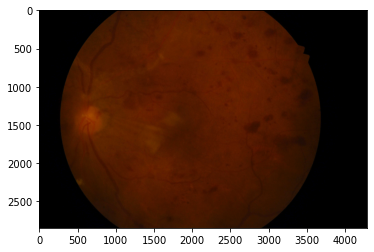

In [0]:
df2=pd.read_csv('B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels for binary  classification.csv')  
df3=pd.read_csv('B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv')  
reader=df3[['Image name','Retinopathy grade','Risk of macular edema ']]
test=[]
target=[]
f="B. Disease Grading/1. Original Images/Test/b. Testing Set/"# cropped/"
for row in range(reader.shape[0]):
    #t1=0,t2=0
    test.append(f+reader.iloc[row, 0]+str(".jpg"))
from matplotlib import pyplot as pltdf2
im=plt.imread(test[0])
plt.imshow(im)
plt.show()
writer_test=[]
images_test=[]
for i in range(len(test)):

           try:
                    imgfile = Image.open(test[i]) 
                    # c=c+1#    imgfile.show()
                    img = load_img(test[i], grayscale=False, target_size=(512, 512,3))


                    img = img_to_array(img)


                    img = img.astype('float32')


                    img = img / 255.0
                    images_test.append(img)

                    value = img.flatten()
                    writer_test.append(value)

#                     with open("trainX.csv", 'a') as f:

#                             writer = csv.writer(f)
#                             writer.writerow(value)

           except OSError as e:

                   print("last file is"+file)

,Image name,Risk of macular edema
Retinopathy grade,,
0,34,34
1,69,69


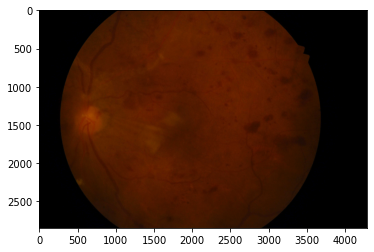

In [0]:
im=plt.imread(test[0])
plt.imshow(im)
df2[['Retinopathy grade']].head(3)
df2.pivot_table(index='Retinopathy grade', aggfunc=len)

In [0]:
import numpy as np
X_test=np.array(writer_test[:][:])
Y_test=df2[['Retinopathy grade']]#,'Risk of macular edema '
Y_test=np.array(Y_test[:][:])
X_test=X_test.reshape([len(writer_test),512,512 ,3])
Y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

#**evaluate**

VGG

In [0]:
"VGG"
y_pred = VGG16_model.predict(X_test)
np.unique(y_pred)

array([0.00691422, 0.00931615, 0.0516174 , 0.0696946 , 0.09862474,
       0.15969047, 0.18058594, 0.2149512 , 0.23055461, 0.28557575,
       0.34685832, 0.34861436, 0.38873857, 0.44081718, 0.44214395,
       0.5049229 , 0.5233502 , 0.55019826, 0.5552715 , 0.5611817 ,
       0.6742101 , 0.6931167 , 0.6936745 , 0.69618875, 0.7087524 ,
       0.721589  , 0.7318735 , 0.76219404, 0.7640655 , 0.7673791 ,
       0.76980793, 0.79950064, 0.8047345 , 0.8077959 , 0.81965226,
       0.8223    , 0.82453394, 0.8333039 , 0.8372104 , 0.839475  ,
       0.8432481 , 0.8454262 , 0.8507336 , 0.85519993, 0.8588766 ,
       0.8614201 , 0.8653951 , 0.86712843, 0.86916333, 0.8728455 ,
       0.88350946, 0.8910389 , 0.903048  , 0.9050509 , 0.9082086 ,
       0.9086324 , 0.91096544, 0.91335607, 0.91660935, 0.92526644,
       0.9261509 , 0.92694384, 0.9300175 , 0.9365411 , 0.936879  ,
       0.93946373, 0.9395375 , 0.94203514, 0.9423654 , 0.94546   ,
       0.9465271 , 0.9494849 , 0.9504651 , 0.9510124 , 0.95161

4/4 [==============================] - 1s 218ms/step - loss: 0.6001 - accuracy: 0.6990
Loss = 0.6000998020172119
f1_score of vgg = 0.6660945842868039
f1_score of vgg = 0.6699029126213593
f1_score of vgg = 0.6782119926240251


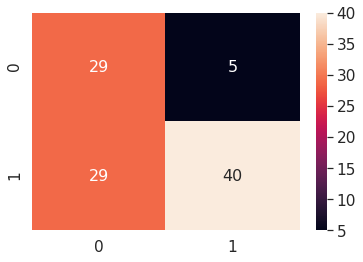

In [0]:
# y_pred = VGG16_model.predict(X_test)
for i in  range(len(y_pred)):
  if y_pred[i]> 0.9591811:
    y_pred[i]=1

  else:
    y_pred[i]=0

from sklearn.metrics import f1_score
preds = VGG16_model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("f1_score of vgg = " + str(f1_score(Y_test, y_pred, average='macro')))
print ("f1_score of vgg = " + str(f1_score(Y_test, y_pred, average='micro')))

print ("f1_score of vgg = " + str(f1_score(Y_test, y_pred, average='weighted')))
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt     
df_cm = confusion_matrix(Y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

#  Mobilenet model

In [0]:

preds = mobile_model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy of mobileNet= " + str(preds[1]))
y_pred = mobile_model.predict(X_test)
np.unique(y_pred)

4/4 [==============================] - 0s 61ms/step - loss: 0.8128 - accuracy: 0.7670
Loss = 0.8128347396850586
Test Accuracy of mobileNet= 0.7669903039932251


array([4.40008516e-05, 5.04074269e-04, 1.39248872e-03, 1.58530753e-03,
       2.82802409e-03, 3.06102517e-03, 3.21816024e-03, 3.76851694e-03,
       4.06526774e-03, 5.83306001e-03, 5.99207124e-03, 6.86675543e-03,
       7.38408603e-03, 7.81962462e-03, 8.38573743e-03, 9.16407444e-03,
       1.18071279e-02, 1.22354478e-02, 1.26323039e-02, 1.75939444e-02,
       1.93761196e-02, 1.95238814e-02, 2.23755296e-02, 2.40307283e-02,
       2.43454538e-02, 2.44665314e-02, 2.57887039e-02, 2.80722883e-02,
       3.16843837e-02, 3.38578895e-02, 3.76259163e-02, 4.70762700e-02,
       5.13337590e-02, 5.70970103e-02, 7.24608004e-02, 7.47897997e-02,
       7.70062730e-02, 8.24234486e-02, 8.93827900e-02, 9.32408795e-02,
       1.01902984e-01, 1.26613155e-01, 1.34558722e-01, 3.05633307e-01,
       3.52541715e-01, 3.75075281e-01, 3.89266670e-01, 4.20612693e-01,
       4.24796700e-01, 4.77686405e-01, 5.38111091e-01, 6.88733816e-01,
       7.65429616e-01, 8.14159989e-01, 8.62101138e-01, 8.70893598e-01,
      

4/4 [==============================] - 0s 60ms/step - loss: 0.8128 - accuracy: 0.7670
Loss = 0.8128347396850586
Test Accuracy= 0.7669903039932251
f1_score  = 0.7771439811172305
f1_score  = 0.7864077669902912
f1_score  = 0.7925836242389983


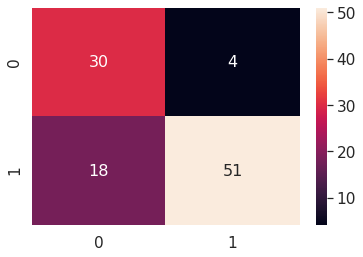

In [0]:
from sklearn.metrics import f1_score
preds = mobile_model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy= " + str(preds[1]))
y_pred = mobile_model.predict(X_test)
# np.unique(y_pred)
for i in  range(len(y_pred)):
  if y_pred[i]> 4.20612693e-01:
    y_pred[i]=1

  else:
    y_pred[i]=0


print ("f1_score  = " + str(f1_score(Y_test, y_pred, average='macro')))
print ("f1_score  = " + str(f1_score(Y_test, y_pred, average='micro')))

print ("f1_score  = " + str(f1_score(Y_test, y_pred, average='weighted')))
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
df_cm = confusion_matrix(Y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# ***Boosting techniques***

New Data Size: 9930 Old Size: 7370
wi


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier...!
[[23 22]
 [ 7 51]]
              precision    recall  f1-score   support

           0       0.77      0.51      0.61        45
           1       0.70      0.88      0.78        58

    accuracy                           0.72       103
   macro avg       0.73      0.70      0.70       103
weighted avg       0.73      0.72      0.71       103



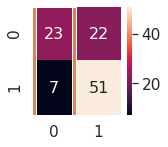

AdaBoost Algorithm...!


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[22 23]
 [11 47]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.67      0.81      0.73        58

    accuracy                           0.67       103
   macro avg       0.67      0.65      0.65       103
weighted avg       0.67      0.67      0.66       103



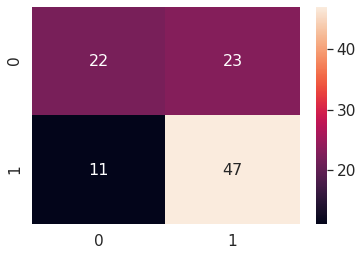

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn import metrics 


"balancing using the replacement method"

def balance_data(class_size,df):
    train_df = df.groupby(['Retinopathy grade']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['Retinopathy grade'].hist(figsize = (10, 5))
    return train_df



df_train = pd.read_csv('Train_agmented.csv',sep=',')
df_train = balance_data(int(df_train.pivot_table(index='Retinopathy grade', aggfunc=len).max().max()),df_train) # I will oversample such that all classes have the same number of images as the maximum
df_train['Retinopathy grade'].hist(figsize = (2, 2))

df_test = pd.read_csv('calculated_features_DR_Grading_Test.csv',sep=',')
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_test = shuffle(df_test)
print("wi")
X_train=df_train[['lbp1','lbp2','lbp3','lbp4','lbp5','lbp6','lbp7','lbp8','lbp9','lbp10',
                  "m_rgb","m_hsv","m_hls","hu_moments_1","hu_moments_2","hu_moments_3",
                  "hu_moments_4","hu_moments_5","hu_moments_6"]]#,,"hu_moments_7","haralick_1","haralick_2","haralick_3","haralick_4","haralick_5","haralick_6","haralick_7","haralick_8","haralick_9","haralick_10","haralick_11","haralick_12","haralick_13"]]

y_train=df_train[['Retinopathy grade']]#, 'Risk of macular edema']]
X_test=df_test[['lbp1','lbp2','lbp3','lbp4','lbp5','lbp6','lbp7','lbp8','lbp9','lbp10',"m_rgb","m_hsv","m_hls",
                "hu_moments_1","hu_moments_2","hu_moments_3","hu_moments_4","hu_moments_5","hu_moments_6"]]#,,"hu_moments_7","haralick_1"]]#,"haralick_2","haralick_3","haralick_4","haralick_5","haralick_6","haralick_7","haralick_8","haralick_9","haralick_10","haralick_11","haralick_12","haralick_13"]]

y_test=df_test[['Retinopathy grade']]#, 'Risk of macular edema']]
#from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)

# svclassifier.fit(X_train, y_train)
# print("done...!")
y_pred = clf.predict(X_test)

''' EVALUATE '''
print("GradientBoostingClassifier...!")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt     
df_cm = confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

print("AdaBoost Algorithm...!")

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

''' EVALUATE '''
# print("done...!")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt     
df_cm = confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# print("done...!")
